# Predicting  The Flight Ticket Price

# Import the libraries
Import Necessary Libraries To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [1]:
import sys    #for python version
import sklearn
import pandas
import numpy
import seaborn
import matplotlib

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scikit-learn: 0.22.1
Pandas: 1.0.1
Numpy: 1.18.1
seaborn: 0.10.0
matplotlib: 3.1.3


# Exploratory Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# Importing dataset
1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Complete summary of data by using describe inbuilt function.

In [3]:
df_train=pd.read_excel('Data_Train.xlsx')


In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df_train),len(df_train.columns)))

Input data has 10683 rows and 11 col


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# All About data
<b>FEATURES</b>: 

- <b>Airline</b>          : The name of the airline.

- <b>Date_of_Journey</b>  : The date of the journey

- <b>Source</b>           : The source from which the service begins.

- <b>Destination</b>      : The destination where the service ends.

- <b>Route</b>            : The route taken by the flight to reach the destination.

- <b>Dep_Time</b>         : The time when the journey starts from the source.

- <b>Arrival_Time</b>     : Time of arrival at the destination.

- <b>Duration</b>         : Total duration of the flight.

- <b>Total_Stops</b>      : Total stops between the source and destination.

- <b>Additional_Info</b>  : Additional information about the flight

- <b>Price</b>            : The price of the ticket

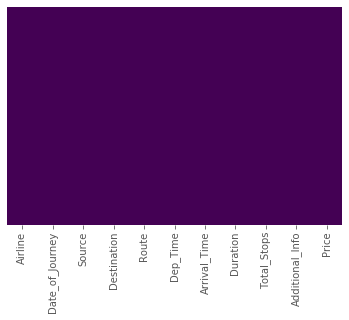

In [7]:
#check for null values in dataset
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Here we can see only 1 value missing in two columns so we can drop that two rows by using dropna function.

In [9]:
df_train.dropna(inplace = True)

In [10]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

So,now we don't have any missing values in the train dataset.

# Feature Engineering

1. From the dataset we can see almost all the columns are in object type we need to convert this columns into respective type 
2. First we convert Date format columns into date type

Now we first separate the <b>Date_of_journey</b> into <b>year</b> ,<b>date</b>, <b>month</b> indivisually as it is in string format we can split by using <b>/</b> operator based on the index values.

For this we can use <b>string</b>  format separation or we can <b>to_datetime</b> from pandas library so that we can convert object to timestamp format. 

1. .dt.day method will extract only day of that date

2. .dt.month method will extract only month of that date

In [11]:
df_train['Date']=df_train['Date_of_Journey'].str.split('/').str[0].astype(int)

In [12]:
df_train['Month']=df_train['Date_of_Journey'].str.split('/').str[1].astype(int)

In [13]:
df_train['Year']=df_train['Date_of_Journey'].str.split('/').str[2].astype(int)

In [14]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


By using string format operation we extracted the required information from <b>Date_of_Journey</b> column

Next we look up towards arrival time as we done with date of journey . As <b>Arrival time</b> is in string format we can separate with space index so we get only arrival time. 
As we no need of month because we already extracted month from the <b>date_of_journey</b> column.

In [15]:
df_train['Arrival_Time']=df_train['Arrival_Time'].str.split(' ').str[0]

Now we separate the hours and minutes into new features.

In [16]:
df_train['Arrival_Hour'] = df_train['Arrival_Time'] .str.split(':').str[0].astype(int)

In [17]:
df_train['Arrival_Minute'] = df_train['Arrival_Time'] .str.split(':').str[1].astype(int)

Next we focus on depature time from we can extract hours and minutes as a new features

In [18]:
df_train['Departure_Hour'] = df_train['Dep_Time'] .str.split(':').str[0].astype(int)

In [19]:
df_train['Departure_Minute'] = df_train['Dep_Time'] .str.split(':').str[1].astype(int)

Now we perform on Duration column here we can separate hours and minutes but first we need to separate by space and later into hours and minutes by using string functions

In [20]:
df_train['Duration_hours']=df_train['Duration'].str.split(' ').str[0]

In [21]:
df_train['Duration_min']=df_train['Duration'].str.split(' ').str[1]

Now we can easliy separate the hours and minutes by index values

In [22]:
df_train['Duration_hour']=df_train['Duration_hours'].str.split('h').str[0]

In [23]:
df_train['Duration_minu']=df_train['Duration_min'].str.split('m').str[0]

In [24]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_min,Duration_hour,Duration_minu
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2h,50m,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7h,25m,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19h,NaN,19,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5h,25m,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4h,45m,4,45


# Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

Now We need to divide the Route separately we can observe that in one row we have only boarding and in some other we have both return and boarding journey details so for this we need to divide into five Routes by using string operations.

In [25]:
df_train['Route_1']=df_train['Route'].str.split('→ ').str[0]

In [26]:
df_train['Route_2']=df_train['Route'].str.split('→ ').str[1]

In [27]:
df_train['Route_3']=df_train['Route'].str.split('→ ').str[2]

In [28]:
df_train['Route_4']=df_train['Route'].str.split('→ ').str[3]

In [29]:
df_train['Route_5']=df_train['Route'].str.split('→ ').str[4]

In [30]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_min,Duration_hour,Duration_minu,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2h,50m,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7h,25m,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19h,NaN,19,NaN,DEL,LKO,BOM,COK,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5h,25m,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4h,45m,4,45,BLR,NAG,DEL,NaN,NaN


Now we need to fill Nan values in Routes columns so impute it with None values and later we can convert into numerical by label encoding.

In [31]:
df_train['Route_1'].fillna("None",inplace=True)

In [32]:
df_train['Route_2'].fillna("None",inplace=True)

In [33]:
df_train['Route_3'].fillna("None",inplace=True)

In [34]:
df_train['Route_4'].fillna("None",inplace=True)

In [35]:
df_train['Route_5'].fillna("None",inplace=True)

In [36]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_min,Duration_hour,Duration_minu,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2h,50m,2,50,BLR,DEL,None,None,None
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7h,25m,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19h,NaN,19,NaN,DEL,LKO,BOM,COK,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5h,25m,5,25,CCU,NAG,BLR,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4h,45m,4,45,BLR,NAG,DEL,None,None


So I think We have extracted maximun information from the features and created a new features . Now we can remove/drop the unwanted features from the dataset

In [37]:
df_train=df_train.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Duration_hours','Duration_min'],axis=1)

In [38]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minu,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,19,NaN,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45,BLR,NAG,DEL,None,None


Now we check how many numerical and categorical variables present in the dataset and we convert categorical into numerical by label encoding

In [39]:
Categorical_features = [variables for variables in df_train.columns if df_train[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))
print(Categorical_features)

Number of Categorical variables:  12
['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Duration_hour', 'Duration_minu', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']


In [40]:
numerical_features = [variables for variables in df_train.columns if df_train[variables].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  8
['Price', 'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute']


# Convert categorical to Numeric values

In [41]:
from sklearn.preprocessing import LabelEncoder
for variables in Categorical_features:
    le=LabelEncoder()
    df_train[variables]=le.fit_transform(df_train[variables].astype(str))

In [42]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minu,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,4,8,3897,24,3,2019,1,10,22,20,11,9,0,13,24,12,4
1,1,3,0,1,8,7662,1,5,2019,13,15,5,50,41,3,2,25,1,3,4
2,4,2,1,1,8,13882,9,6,2019,4,25,9,25,10,11,3,32,4,5,4
3,3,3,0,0,8,6218,12,5,2019,23,30,18,5,38,3,2,34,3,12,4
4,3,0,5,0,8,13302,1,3,2019,21,35,16,50,33,7,0,34,8,12,4


In [43]:
df_train['Total_Stops'].value_counts()

0    5625
4    3491
1    1520
2      45
3       1
Name: Total_Stops, dtype: int64

In [44]:
df_train['Source'].value_counts()

2    4536
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64

In [45]:
df_train['Airline'].value_counts()

4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

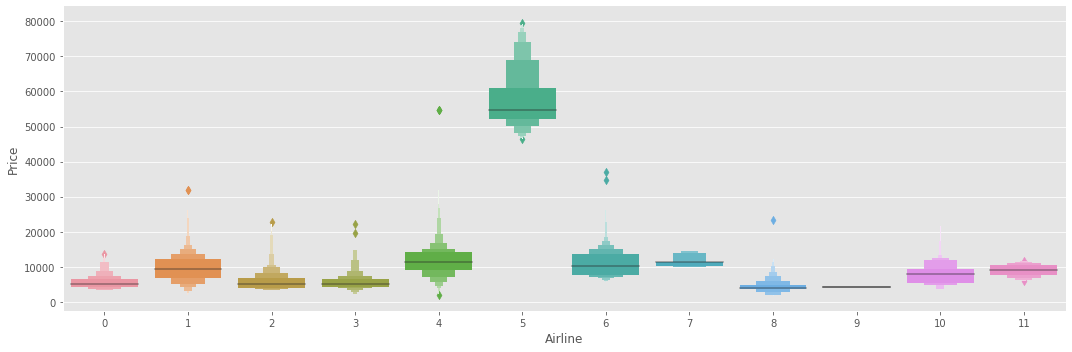

In [46]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(x = "Airline",y = "Price", data = df_train.sort_values("Price", ascending = False), kind="boxen",aspect=3)
plt.show()

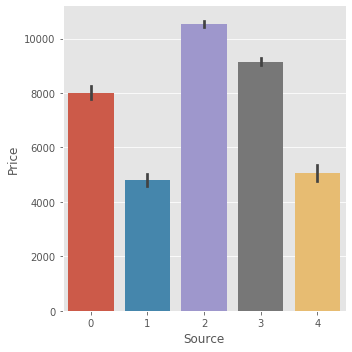

In [47]:
# Source vs Price
sns.catplot(x = "Source",y = "Price", data = df_train.sort_values("Price", ascending = False), kind="bar")
plt.show()

In [48]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minu,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,4,8,3897,24,3,2019,1,10,22,20,11,9,0,13,24,12,4
1,1,3,0,1,8,7662,1,5,2019,13,15,5,50,41,3,2,25,1,3,4
2,4,2,1,1,8,13882,9,6,2019,4,25,9,25,10,11,3,32,4,5,4
3,3,3,0,0,8,6218,12,5,2019,23,30,18,5,38,3,2,34,3,12,4
4,3,0,5,0,8,13302,1,3,2019,21,35,16,50,33,7,0,34,8,12,4


In [49]:
df_train.shape

(10682, 20)

## Now same operation need to perform on test data

In [50]:
df_test=pd.read_excel('Test_set.xlsx')

In [51]:
#Test Data
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


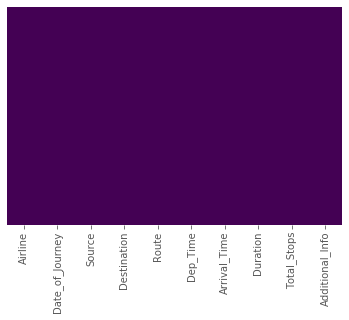

In [52]:
#check for null values in dataset
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [54]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df_test),len(df_test.columns)))
print()
print("Test data info")
print(df_test.info())


print("-------------------------")
# Feature Engineering
#separating Date_of_journey to indivisual date month year
df_test['Date']=df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test['Month']=df_test['Date_of_Journey'].str.split('/').str[1].astype(int)
df_test['Year']=df_test['Date_of_Journey'].str.split('/').str[2].astype(int)


#Arrival Time
df_test['Arrival_Time']=df_test['Arrival_Time'].str.split(' ').str[0]
df_test['Arrival_Hour'] = df_test['Arrival_Time'] .str.split(':').str[0].astype(int)
df_test['Arrival_Minute'] = df_test['Arrival_Time'] .str.split(':').str[1].astype(int)

#depature time
df_test['Departure_Hour'] = df_test['Dep_Time'] .str.split(':').str[0].astype(int)
df_test['Departure_Minute'] = df_test['Dep_Time'] .str.split(':').str[1].astype(int)


#Duration
df_test['Duration_hours']=df_test['Duration'].str.split(' ').str[0]
df_test['Duration_min']=df_test['Duration'].str.split(' ').str[1]
df_test['Duration_hour']=df_test['Duration_hours'].str.split('h').str[0]
df_test['Duration_minu']=df_test['Duration_min'].str.split('m').str[0]

#Now We need to divide the Route separately we can observe that in one row we have only boarding and in some other we have both return and boarding journey details so for this we need to divide into five Routes by using string operations.
df_test['Route_1']=df_test['Route'].str.split('→ ').str[0]
df_test['Route_2']=df_test['Route'].str.split('→ ').str[1]
df_test['Route_3']=df_test['Route'].str.split('→ ').str[2]
df_test['Route_4']=df_test['Route'].str.split('→ ').str[3]
df_test['Route_5']=df_test['Route'].str.split('→ ').str[4]
#Now we need to fill Nan values in Routes columns so impute it with None values and later we can convert into numerical by label encoding.
df_test['Route_1'].fillna("None",inplace=True)
df_test['Route_2'].fillna("None",inplace=True)
df_test['Route_3'].fillna("None",inplace=True)
df_test['Route_4'].fillna("None",inplace=True)
df_test['Route_5'].fillna("None",inplace=True)




df_test=df_test.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Duration_hours','Duration_min'],axis=1)
print(df_test.head())

#Converting categorical variables into numeric
Categorical_features = [variables for variables in df_test.columns if df_test[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))
print(Categorical_features)

print('--------------------------')
numerical_features = [variables for variables in df_test.columns if df_test[variables].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

print('--------------------------')
#Using label encoder for conversion of categorical variables
from sklearn.preprocessing import LabelEncoder
for variables in Categorical_features:
    le=LabelEncoder()
    df_test[variables]=le.fit_transform(df_test[variables].astype(str))
    

print(df_test.head())

Input data has 2671 rows and 10 col

Test data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
-------------------------
             Airline    Source Destination Total_Stops  \
0        Jet Airways     Delhi      Cochin      1 stop   
1             IndiGo   Kolkata    Banglore      1 stop   
2        Jet Airways     Delhi      Cochin      1 sto

In [55]:
df_test.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minu,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,0,5,6,6,2019,4,25,17,30,1,10,3,7,5,8,3
1,3,3,0,0,5,12,5,2019,10,20,6,20,33,11,2,29,3,8,3
2,4,2,1,0,3,21,5,2019,19,0,19,15,15,7,3,7,5,8,3
3,6,2,1,0,5,21,5,2019,21,0,8,0,4,11,3,7,5,8,3
4,0,0,2,4,5,24,6,2019,2,45,23,55,11,9,0,13,21,8,3


In [56]:
df_test.shape

(2671, 19)

# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable.

Following are some of the feature selection methods


1. **heatmap**
2. **feature_importance_**
3. **SelectKBest**

In [57]:
df_train.shape

(10682, 20)

In [58]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute', 'Duration_hour', 'Duration_minu',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [59]:
X=df_train.loc[:,['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute', 'Duration_hour', 'Duration_minu',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']]

In [60]:
y=df_train['Price']

In [61]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [62]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [63]:
print(selection.feature_importances_)

[0.12648456 0.00832485 0.0174353  0.33243934 0.05396965 0.13174563
 0.04633511 0.         0.02313304 0.01530025 0.01846161 0.0178044
 0.02652717 0.01440313 0.01639903 0.05806015 0.07284203 0.01973489
 0.00059987]


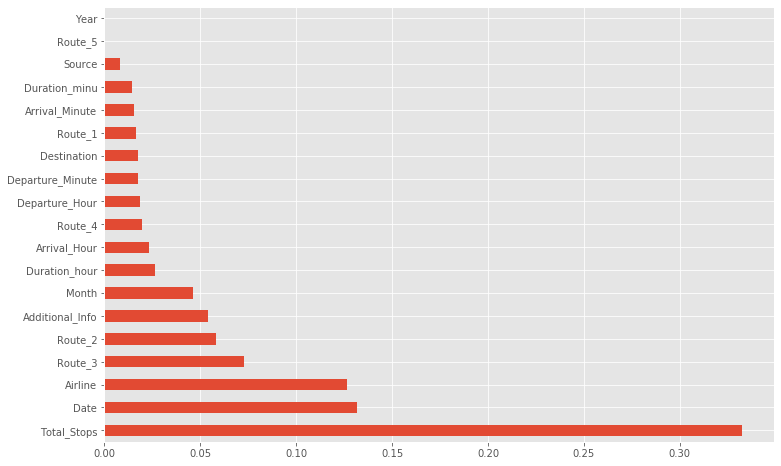

In [64]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


From this we can remove/drop year and route_5 columns

In [65]:
X=X.drop(['Year','Route_5'],axis=1)

In [66]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minu,Route_1,Route_2,Route_3,Route_4
0,3,0,5,4,8,24,3,1,10,22,20,11,9,0,13,24,12
1,1,3,0,1,8,1,5,13,15,5,50,41,3,2,25,1,3
2,4,2,1,1,8,9,6,4,25,9,25,10,11,3,32,4,5
3,3,3,0,0,8,12,5,23,30,18,5,38,3,2,34,3,12
4,3,0,5,0,8,1,3,21,35,16,50,33,7,0,34,8,12


## Model building 

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
y_pred = rf.predict(X_test)

In [70]:
rf.score(X_train, y_train)

0.9824923776960371

In [71]:
rf.score(X_test, y_test)

0.8678690277587203

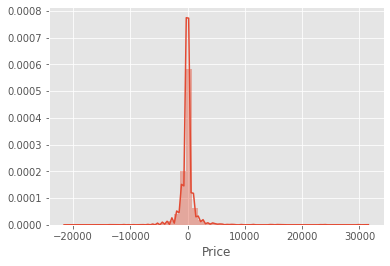

In [72]:
sns.distplot(y_test-y_pred)
plt.show()

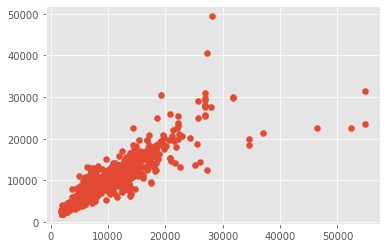

In [73]:
plt.scatter(y_test,y_pred)

In [74]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9315948839268711
MAE: 686.9157076349635
MSE: 2852703.1959346132
RMSE: 1688.9947293981154


## Hyperparameter Tuning for Random Forest


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [90]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
Rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [91]:
Rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 16.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [92]:
Rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [93]:
prediction = Rf_random.predict(X_test)

In [94]:
Rf_random.score(X_train, y_train)

-913011.7481709807

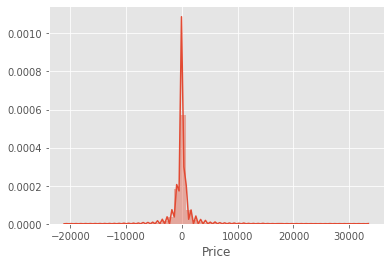

In [95]:
sns.distplot(y_test-prediction)

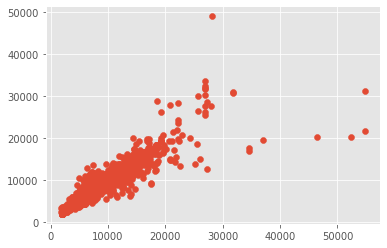

In [96]:
plt.scatter(y_test, prediction)

In [97]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, prediction)))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R square: 0.9278461848310104
MAE: 713.6374303533032
MSE: 3003195.7311165617
RMSE: 1732.973090130531


In [98]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(Rf_random, file)

In [99]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [100]:
y_prediction = forest.predict(X_test)

In [101]:
metrics.r2_score(y_test, y_prediction)

0.8608985427054615